<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Chile_Pacientes_en_UCI_y_total_fallecidos_por_tramo_de_edad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
UCI_raw = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto9/HospitalizadosUCIEtario.csv', index_col='Tramo de edad')

In [3]:
UCI_raw

,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14
Tramo de edad,,,,,,,,,,,,,,
<=39,23,23,26,40,40,38,39,42,46,45,43,41,40,42
40-49,23,27,34,36,40,40,38,39,48,48,50,48,45,43
50-59,53,67,74,84,89,95,101,109,102,111,111,110,112,105
60-69,39,46,56,68,75,78,82,93,89,99,100,106,106,105
>=70,35,37,47,52,63,76,77,79,75,80,79,82,84,84


In [0]:
deaths_raw = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv', index_col='Tramo de edad')

In [5]:
deaths_raw

,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14
Tramo de edad,,,,,,
<=39,2,2,3,3,3,3
40-49,1,2,2,2,2,2
50-59,1,2,2,3,3,5
60-69,9,10,12,12,12,12
70-79,21,22,24,28,29,30
80-89,19,21,24,25,26,32
>=90,4,6,6,7,7,8


In [0]:
data = pd.DataFrame()

In [0]:
data['Pacientes en UCI (2020-04-14)'] = UCI_raw['2020-04-14']

In [8]:
data

,Pacientes en UCI (2020-04-14)
Tramo de edad,
<=39,42
40-49,43
50-59,105
60-69,105
>=70,84


In [0]:
data['Total fallecidos'] = deaths_raw['2020-04-14']

In [10]:
data

,Pacientes en UCI (2020-04-14),Total fallecidos
Tramo de edad,,
<=39,42,3.0
40-49,43,2.0
50-59,105,5.0
60-69,105,12.0
>=70,84,NaN


In [0]:
data.loc['>=70', 'Total fallecidos'] = deaths_raw['2020-04-14'][-3:].sum()

In [12]:
data

,Pacientes en UCI (2020-04-14),Total fallecidos
Tramo de edad,,
<=39,42,3.0
40-49,43,2.0
50-59,105,5.0
60-69,105,12.0
>=70,84,70.0


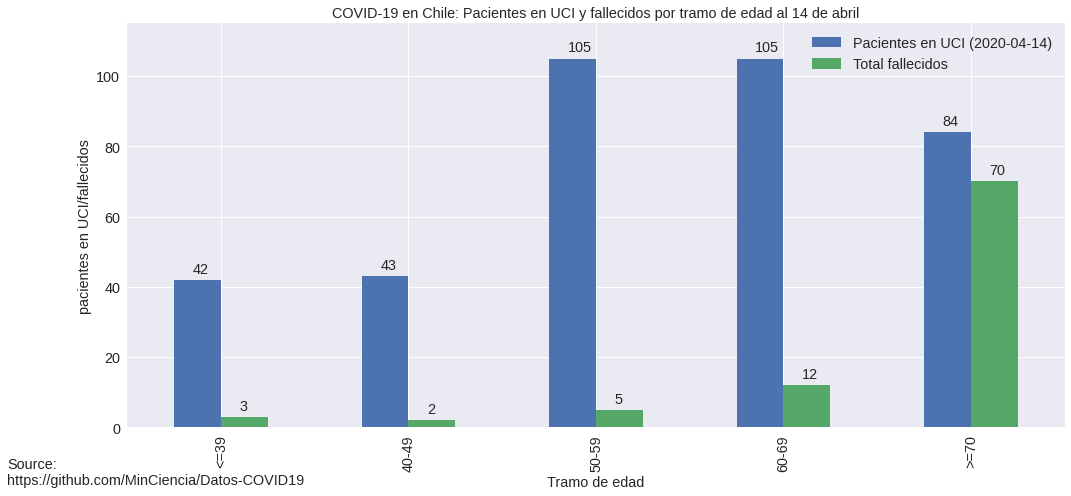

In [13]:
fig, ax = plt.subplots(figsize=(14,7))
data.plot(ax=ax, kind="bar")
for i, val in enumerate(data['Pacientes en UCI (2020-04-14)']):
  ax.text(i-0.15, val+2, f"{val:.0f}", fontsize='x-large')

for i, val in enumerate(data['Total fallecidos']):
  ax.text(i+0.1, val+2, f"{val:.0f}", fontsize='x-large')

ax.tick_params(labelsize='x-large')
ax.set_title(f'COVID-19 en Chile: Pacientes en UCI y fallecidos por tramo de edad al 14 de abril', fontsize='x-large')
ax.set_xlabel(f'Tramo de edad', fontsize='x-large')
ax.set_ylabel(f'pacientes en UCI/fallecidos', fontsize='x-large')
ax.legend(fontsize='x-large')
plt.ylim(0,115)
fig.tight_layout()
plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-120,-30), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('2020-04-15-COVID-19-Chile-Pacientes-en-UCI-y-fallecidos-por-tramo-de-edad.png', format='png', bbox_inches='tight', dvi=1200)

In [0]:
from google.colab import files
files.download("2020-04-15-COVID-19-Chile-Pacientes-en-UCI-y-fallecidos-por-tramo-de-edad.png")